In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
bdd_gms <- read_csv('renormalized_gms_bdd.csv')
dashcam_gms <- read_csv('renormalized_dashcam_gms.csv')
# gms2 <- read_csv('gms2.csv')
# gms <- read_csv('gms.csv')

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  method = col_character(),
  q2 = col_double(),
  q5 = col_double(),
  q8 = col_double(),
  dataset = col_character(),
  object_class = col_character(),
  metric = col_character(),
  recall = col_double(),
  order_key = col_character(),
  norder_key = col_double()
)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  method = col_character(),
  q2 = col_double(),
  q5 = col_double(),
  q8 = col_double(),
  dataset = col_character(),
  object_class = col_character(),
  metric = col_character(),
  recall = col_double(),
  order_key = col_character(),
  norder_key = col_double()
)



In [3]:
#    options(repr.plot.width=3.2, repr.plot.height=3, uni)

make_plot <- function(gms, dataset_name) {
    gms2 <- filter(gms, (!object_class %in% c('geomean')) & (!method %in% c('random')))
    dat = gms2 # bdd_gms2
    if (dataset_name == 'Dashcam'){
        levels <- c('bicycle', 'person', 'traffic light', 'fire hydrant', 'stop sign', 'bus', 'truck')
    } else{
        levels <- c('person', 'bike', 'motor', 'rider', 'bus', 'truck','traffic light', 'traffic sign')
    }

    pt = (ggplot(dat, aes(y=q5, x=factor(object_class, levels=levels), fill=method, fill_alpha=.6))
            + geom_bar(stat='identity', position='dodge')
            + geom_hline(mapping=aes(yintercept=1.,), linetype='dashed')
            + facet_grid(rows=vars(recall), cols=vars(metric), 
                          labeller='label_both', scales='free_y')
            + scale_y_log10()
            + ylab(element_blank())
            + xlab(element_blank())
            +geom_vline(xintercept=seq(1.5, length(unique(dat$object_class))-0.5, 1), lwd=1, colour="white")
            + labs(title = sprintf("Savings on %s dataset", dataset_name))
            + theme(plot.title=element_text(hjust = .5, size=15),
                    legend.title=element_blank(),
                    legend.position='top',
                    panel.grid.major.x = element_blank() ,
                    strip.text=element_text(size=14),
                    legend.margin=margin(t=0, b=0),
                    legend.box.margin=margin(0,0,0,0),
                    axis.text.y=element_text(size=12),
                    axis.text.x=element_text(size=12, angle=90, hjust = 1, vjust=.5),
                    legend.text=element_text(size=13))
         )
    
        pt
    }

In [4]:
bddplot = make_plot(bdd_gms, 'BDD')

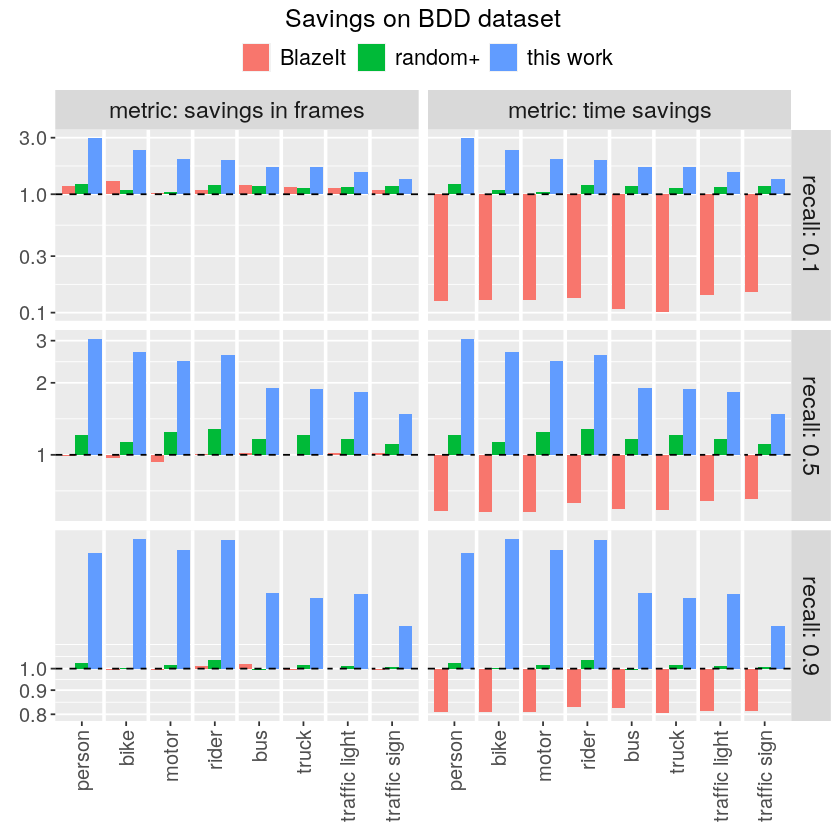

In [5]:
bddplot

In [15]:
ggsave('./assets/bdd_results.pdf', bddplot)#, width = 3.2, height = 3.2, units = 'in')

Saving 6.67 x 6.67 in image



In [8]:
dashplot = make_plot(dashcam_gms, 'Dashcam')

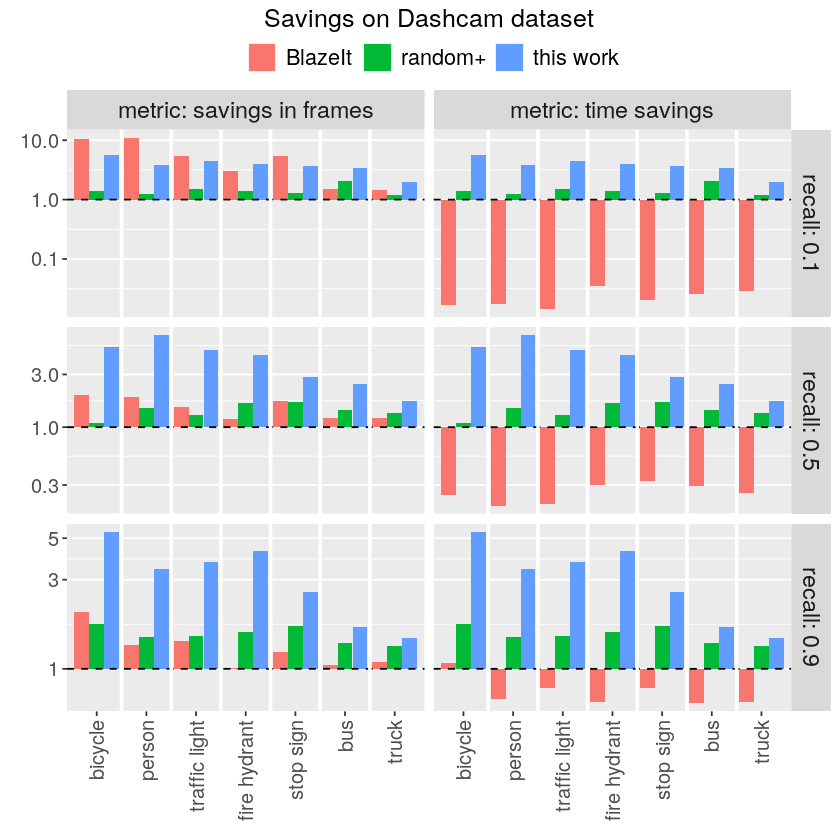

In [9]:
dashplot

In [14]:
ggsave('./assets/dashcam_results.pdf', dashplot)#, width = 3.2, height = 3.2, units = 'in')

Saving 6.67 x 6.67 in image

